Entrenando el sistema...
Modelo entrenado!
Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
El resultado es [[212.39601]] fahrenheit!
Variables internas del modelo
[array([[ 0.11676897,  0.05627147, -0.91084343]], dtype=float32), array([ 0.9144509, -3.2372599, -3.5445845], dtype=float32)]
[array([[-1.0374506 , -0.24235344,  0.7031111 ],
       [-1.4458481 ,  1.7950311 ,  0.34061784],
       [-0.23393197,  1.2184643 ,  0.46262503]], dtype=float32), array([ 1.9084551, -3.4915967,  1.7798011], dtype=float32)]
[array([[ 0.43074822],
       [-1.7569516 ],
       [ 0.02559087]], dtype=float32), array([3.4424026], dtype=float32)]


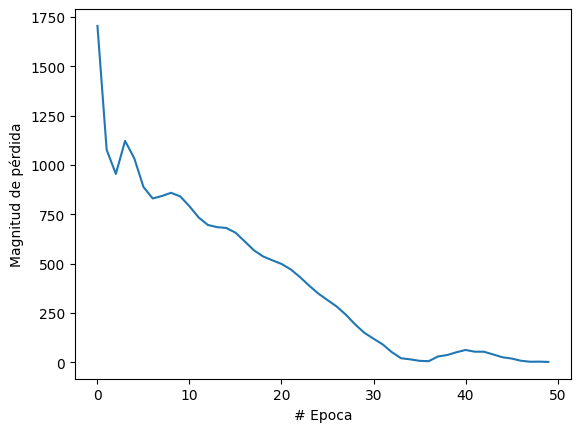

In [8]:
import tensorflow as tf
import numpy as np
#Agregamos las arrays para poder enseñar al sistema.
celsius = np.array([-40, -10, 0, 8, 15, 22, 38.], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)


#Utilizamos la Librería Keras, para crear las capas neuronales utilizando el modelo secuencial.
#Inicialmente se realizó la prueba con una sola capa y una neurona.
#Avanzando en la pruebas dejamos el sistema con 3 capas y una neurona.
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

print("Entrenando el sistema...")
#Con 1000 Ciclos entrenamos el sistema
historial = modelo.fit(celsius, fahrenheit, epochs=50, verbose=False)
print("Modelo entrenado!")

#la librería matplotlib.pyplot nos permite validar por medio de una gráfica
#El avance de aprendizaje por cada ciclo que realiza el sistema.

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
print("Hagamos una predicción!")
# resultado = modelo.predict([100.0])
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())